# Plots for paper

## Imports and directories

In [2]:
import os
while "notebooks" in os.getcwd():
    os.chdir("../")


In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
plt.style.use(['science'])

In [4]:
result_path = Path("results")

In [5]:
plot_directory = Path("plots")

## Plots for precision and time comparison

In [6]:
#iterations = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000]
iterations = [100, 500, 1000, 2000, 4000, 6000, 8000, 10000, 15000, 20000, 25000, 30000, 35000]

def get_mean(std: float, comparison_path: Path, qmc:bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def get_mean_for_set_size(std: float, size: int, comparison_path: Path, qmc: bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        try:
            arr = np.load(comparison_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        except:
            return means
        arr = arr[arr[:, 3] == size]
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 0])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def plot_for_std_separate(std: float, comparision_path: Path, features_number: int):
    fig, axs = plt.subplots(1, 2, figsize=(6, 4))
    for i in range(1, features_number+1, 2):
        means = get_mean_for_set_size(std, i, comparision_path)
        means_qmc = get_mean_for_set_size(std, i, comparision_path, qmc=True)
        if i >= 12:
            axs[0].plot(iterations, means, label = str(i), linestyle='dashed')
            axs[1].plot(iterations, means_qmc, label = str(i), linestyle='dashed')
            
        else:
            axs[0].plot(iterations, means, label = str(i))
            axs[1].plot(iterations, means_qmc, label = str(i))
    
    means = get_mean(std, comparision_path)
    axs[0].plot(iterations, means, label = "Mean", linestyle = 'dashed', linewidth=2)
    axs[0].set_xlim(-1000, 35000)
    axs[1].set_xlim(-1000, 35000)
    axs[0].set_ylim(0, 0.15)#np.max(means))
    axs[1].set_ylim(0, 0.15)#np.max(means))
    axs[0].set(xlabel='Iterations', ylabel='PG Difference')
    #fig.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), frameon=True)
    fig.legend(loc='center right', frameon=True)
    title = f'Mean difference in PG between methods for std = {std}'
    fig.suptitle(title)
    axs[0].set(title = "Monte Carlo") 
    axs[1].set(title = "Quasi Monte Carlo") 
    #plt.yscale("log")
    #fig.subplots_adjust(right=0.75)
    comparision_path = str(comparision_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    plt.savefig(f"{plot_directory}/precision_{model_name}_{std}.jpg")
    plt.show()

In [7]:
def get_equal_number_of_iter_and_prec(std: float, size: int, comparison_path: Path, qmc = False):
    time_differences = []
    means = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if qmc:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        else:
            diffs = np.abs(arr[:, 2] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        if qmc:
            t_diff = np.mean(arr[:, 6] - arr[:, 5])
        else:
            t_diff = np.mean(arr[:, 4] - arr[:, 5])
        time_differences.append(np.mean(t_diff))

    for i in range(0, len(iterations)):
        if time_differences[i] > 0:
            iter = iterations[i] 
            break
    if qmc: 
        print(f"Number of equal iterations for QMC: {iter} with precision of {means[i]}")
    else:
        print(f"Number of equal iterations for MC: {iter} with precision of {means[i]}")


## Wine models

### Wine model single

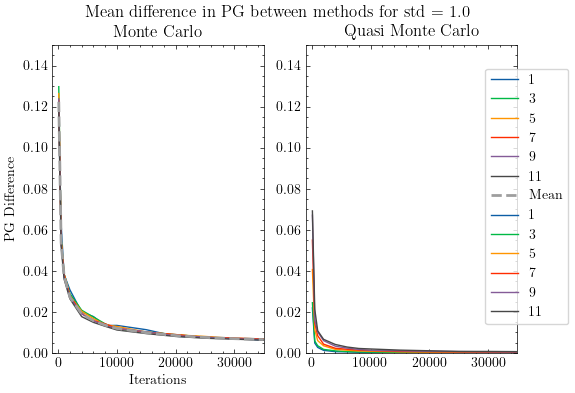

Number of equal iterations for QMC: 100 with precision of 0.12233684906758219
Number of equal iterations for MC: 100 with precision of 0.054226442510248815


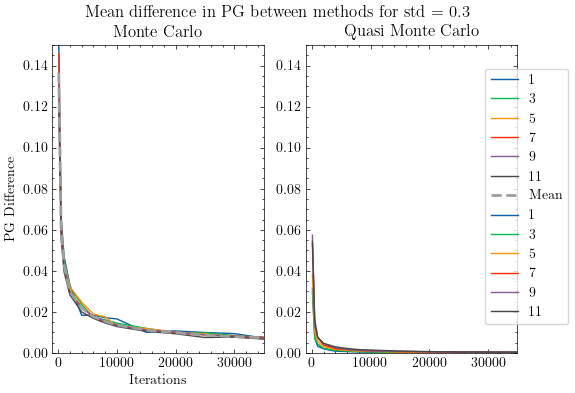

Number of equal iterations for QMC: 100 with precision of 0.13638826193705406
Number of equal iterations for MC: 100 with precision of 0.049408964056634516


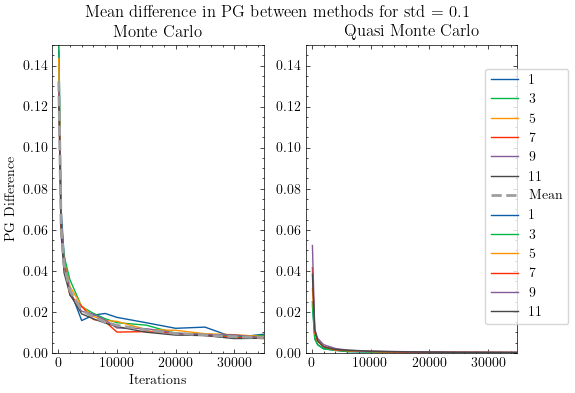

Number of equal iterations for QMC: 100 with precision of 0.13233177909943145
Number of equal iterations for MC: 100 with precision of 0.039945259210929604


In [8]:
comparision_path = Path("results/wine_model_single/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

### Wine model

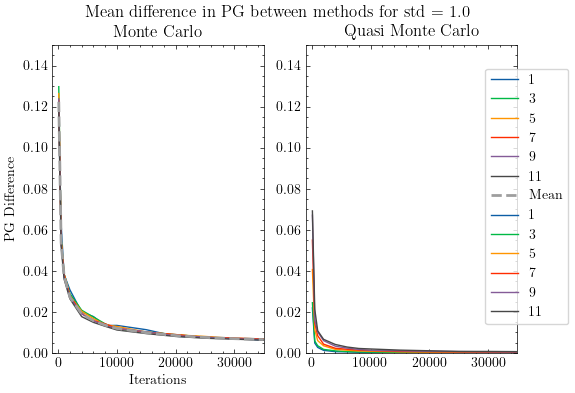

Number of equal iterations for QMC: 100 with precision of 0.12233684906758219
Number of equal iterations for MC: 100 with precision of 0.054226442510248815


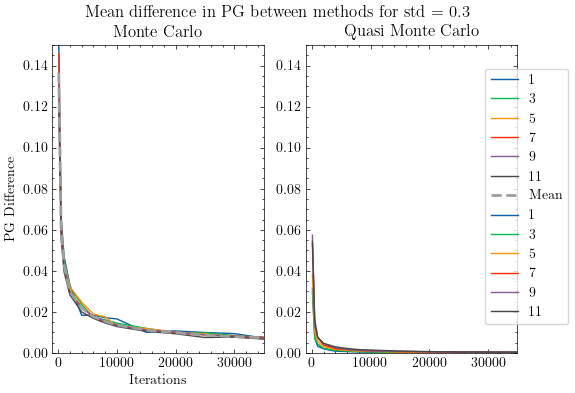

Number of equal iterations for QMC: 100 with precision of 0.13638826193705406
Number of equal iterations for MC: 100 with precision of 0.049408964056634516


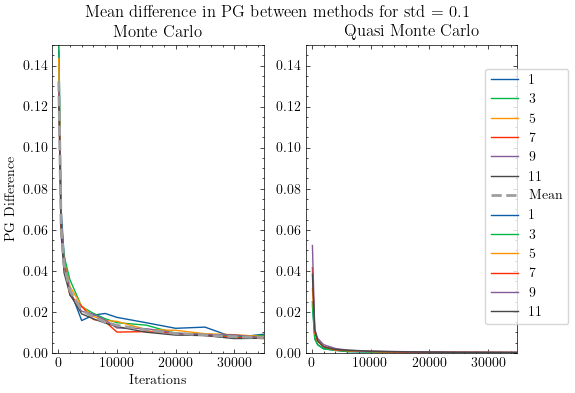

Number of equal iterations for QMC: 100 with precision of 0.13233177909943145
Number of equal iterations for MC: 100 with precision of 0.039945259210929604


In [9]:
comparision_path = Path("results/wine_model/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

## Housing models

### Housing model single

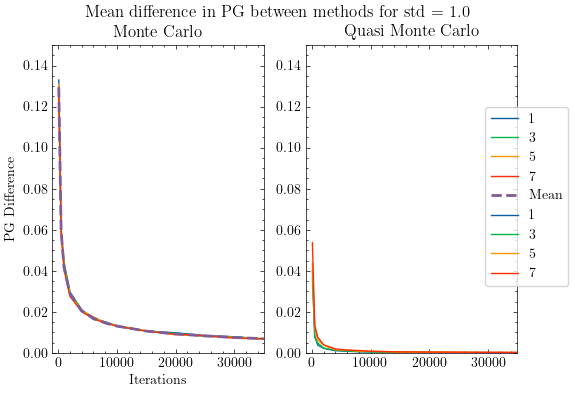

Number of equal iterations for QMC: 100 with precision of 0.12942618834133712
Number of equal iterations for MC: 100 with precision of 0.049076708177125956


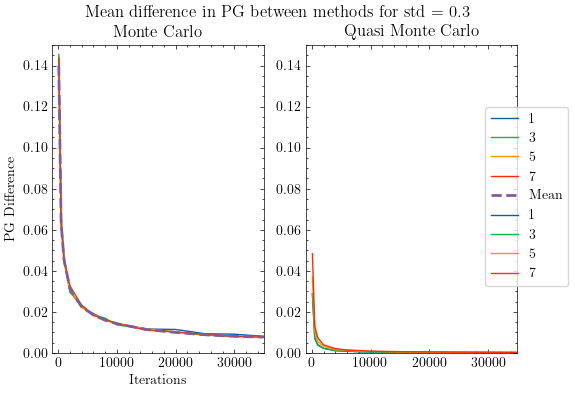

Number of equal iterations for QMC: 100 with precision of 0.1400189069205307
Number of equal iterations for MC: 100 with precision of 0.04325091622259535


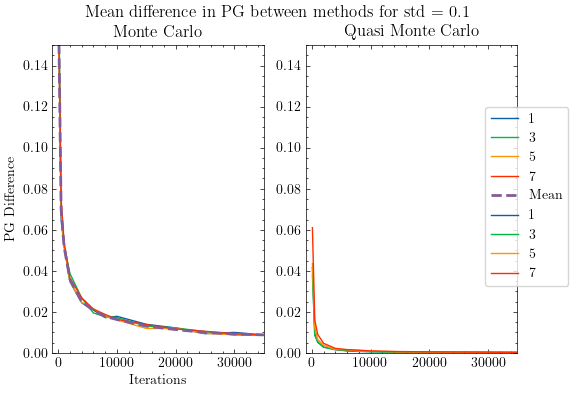

Number of equal iterations for QMC: 100 with precision of 0.15783798973721624
Number of equal iterations for MC: 100 with precision of 0.050938687741594185


In [10]:
comparision_path = Path("results/housing_model_single/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

### Housing model

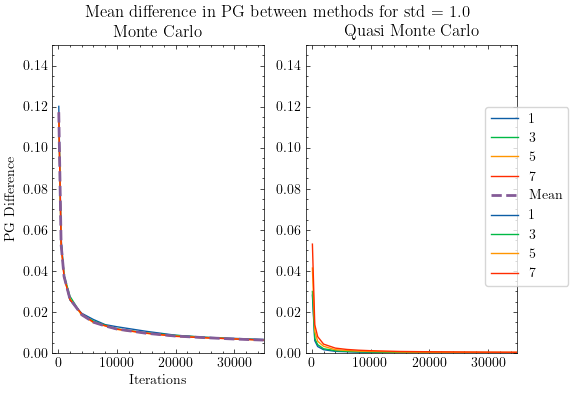

Number of equal iterations for QMC: 15000 with precision of 0.009602119424376011
Number of equal iterations for MC: 15000 with precision of 0.0006113391053820286


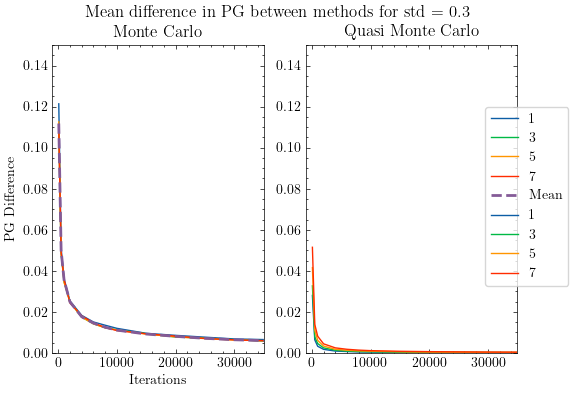

Number of equal iterations for QMC: 10000 with precision of 0.011117869326363487
Number of equal iterations for MC: 10000 with precision of 0.0009806045405275823


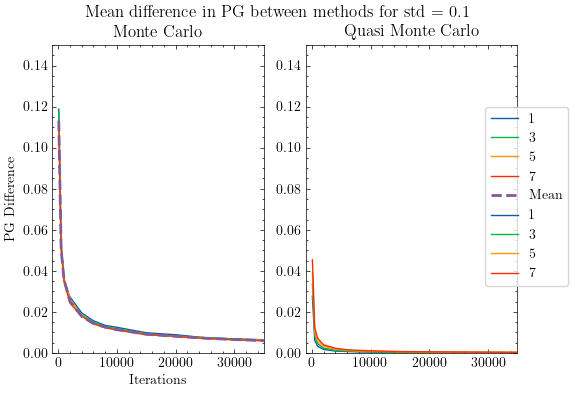

Number of equal iterations for QMC: 4000 with precision of 0.01781894016089092
Number of equal iterations for MC: 4000 with precision of 0.0019738213493362376


In [11]:
comparision_path = Path("results/housing_model/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

## Get relative error for model, std, iterations

## Ranking errors

### Utils

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
def plot_ranking_validation(result_path: Path, stds, feature_numbers, noising=False):
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    df = pd.DataFrame(columns=["method", "value", "stddev"])
    for n in feature_numbers:
        for s in stds:
            if noising:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_noising_std_{s}_tested_features_{n}.npy")
            else:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_retraining_std_{s}_tested_features_{n}.npy")

            for i in range(0, arr.shape[1]):
                point = arr[:, i]
                pg_err = ((point[0] - point[2]))**2
                shap_err = ((point[1] - point[2]))**2
                df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":
                                        s}])],
                    ignore_index=True) 

                df = pd.concat([df, pd.DataFrame([{"method": f"SHAP", "value": shap_err, "stddev":
                                        s}])],
                    ignore_index=True) 
        #print(df)
        sns.barplot(df, y="value", x="stddev", hue="method", ax = axs[n-1]).set(title = f"Deleted features = {n}")




### Wine model

#### Retraining model

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


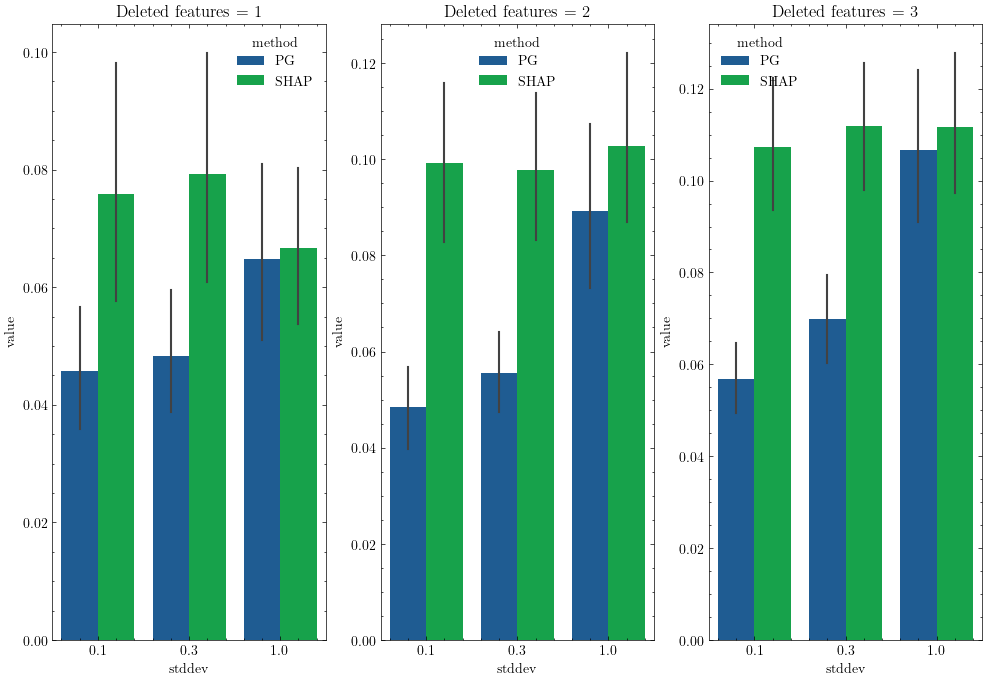

In [68]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False)

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/wine_model/ranking_comparision/ranking_comparision_retraining_std_1.5_tested_features_2.npy'

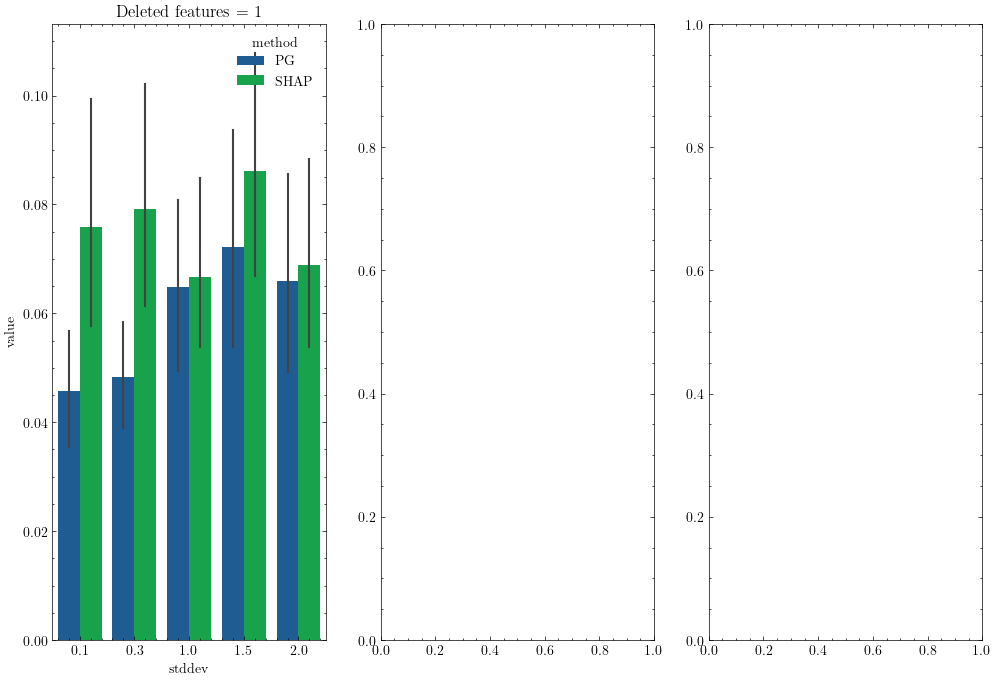

In [71]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2, 3], False)

#### Noising model

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


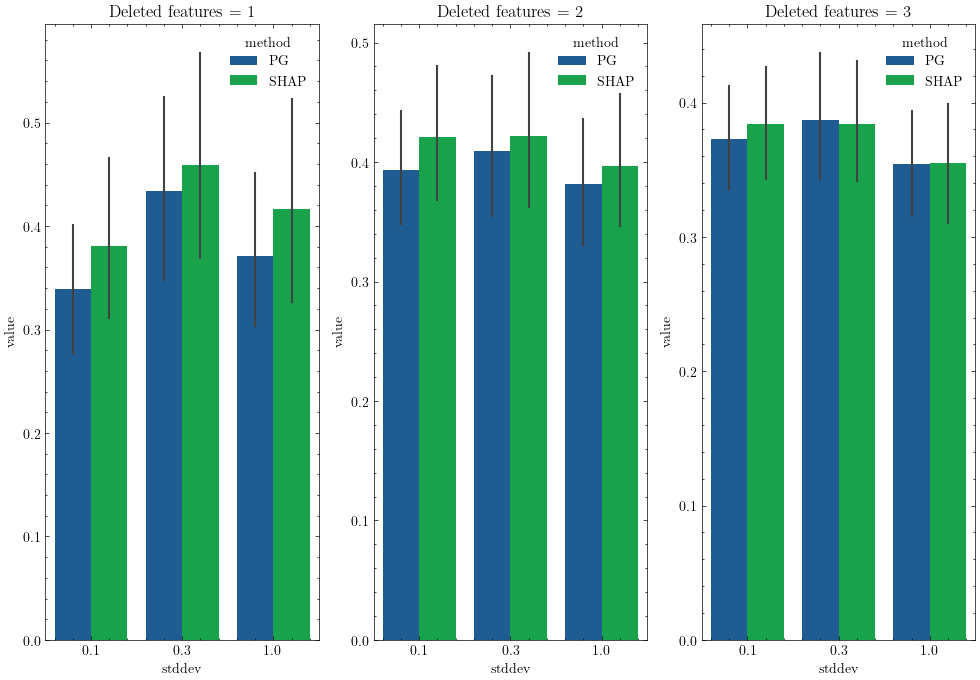

In [70]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True)

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/wine_model/ranking_comparision/ranking_comparision_noising_std_1.5_tested_features_2.npy'

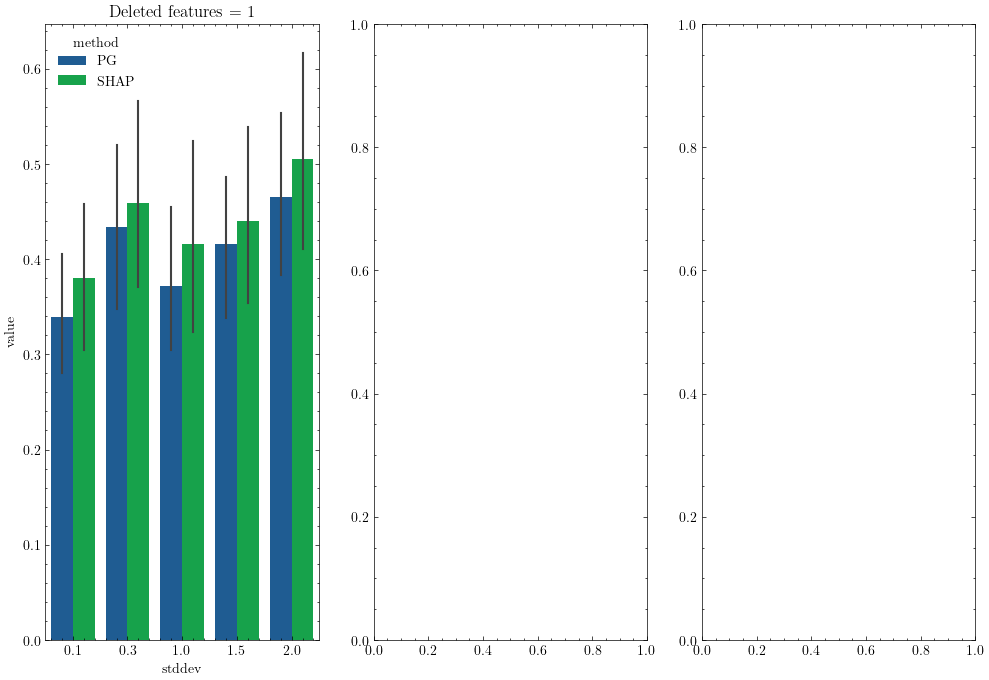

In [72]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2, 3], True)

### Housing model

#### Retraining model

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


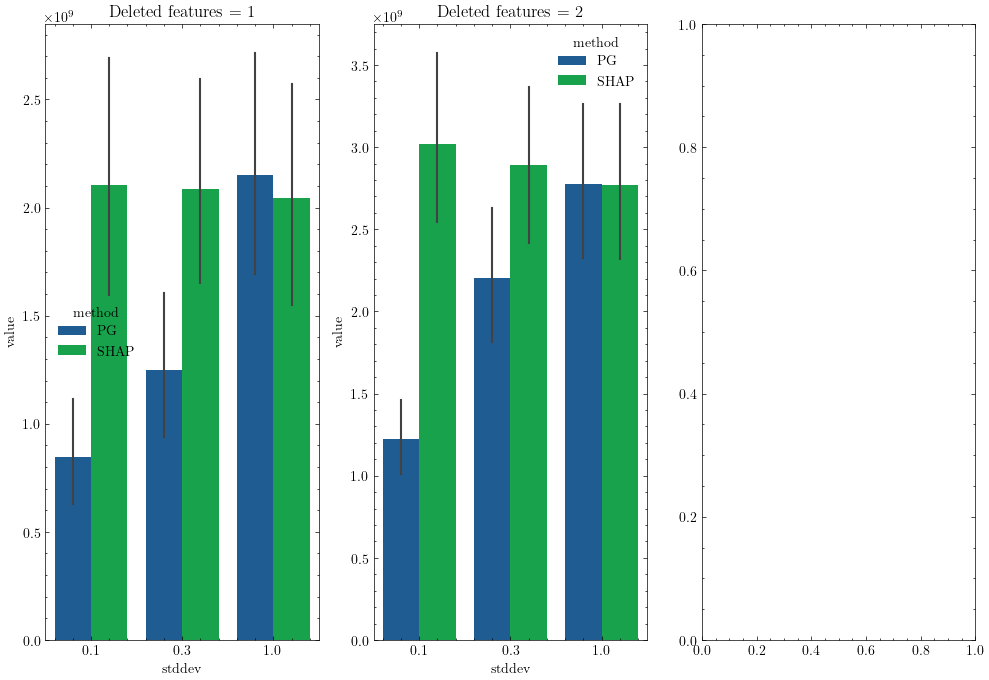

In [73]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2], False)

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/housing_model/ranking_comparision/ranking_comparision_retraining_std_1.5_tested_features_2.npy'

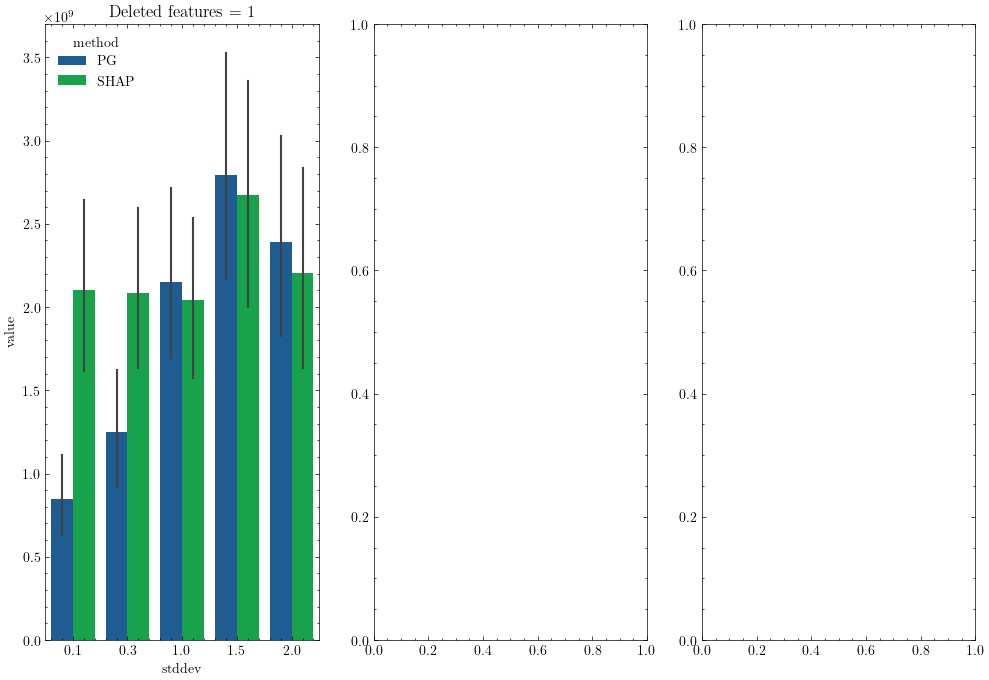

In [74]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2], False)

#### Noising model

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


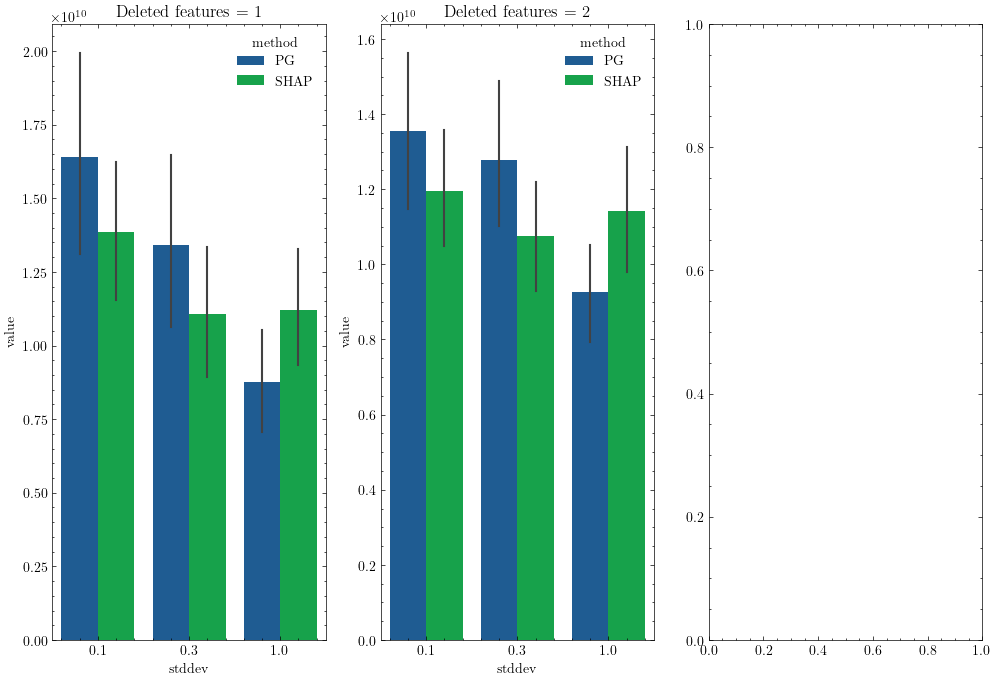

In [75]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2], True)

/tmp/ipykernel_10409/2882052420.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/housing_model/ranking_comparision/ranking_comparision_noising_std_1.5_tested_features_2.npy'

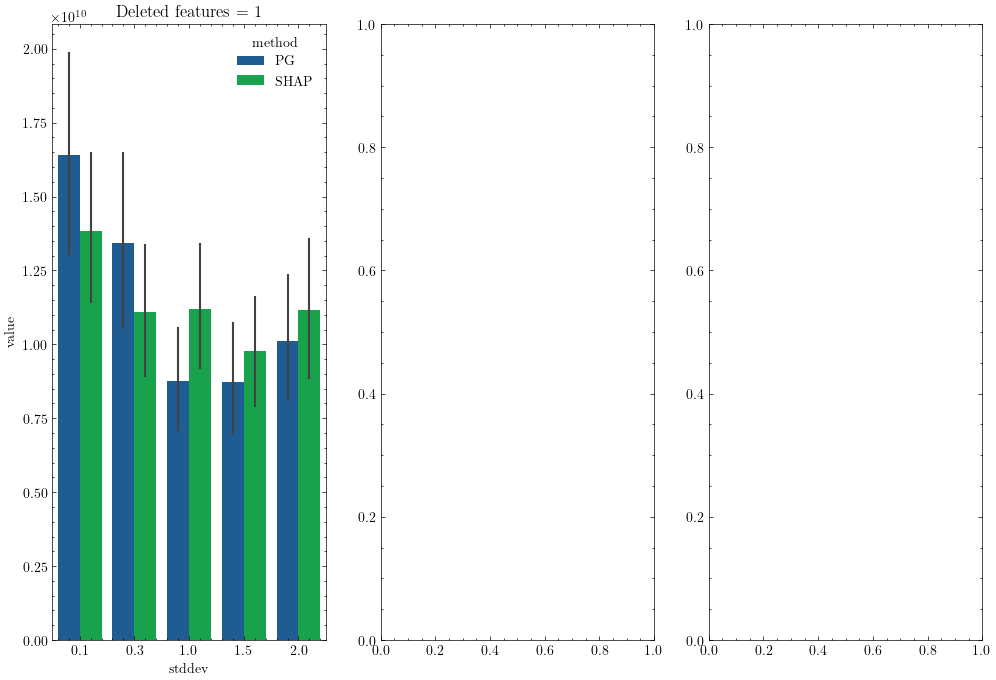

In [76]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2], True)